In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Data exploration

In [64]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
print(df.shape)
df.head()

(973, 15)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## Data types & column renaming

In [66]:
df.rename(columns={
    "Weight (kg)": "weight",
    "Height (m)": "height",
    "Session_Duration (hours)": "session_duration",
    "Water_Intake (liters)": "water_intake",
    "Workout_Frequency (days/week)": "workout_frequency"
}, inplace=True)

In [91]:
df.dtypes

Age                    int64
Gender                object
weight               float64
height               float64
Max_BPM                int64
Avg_BPM                int64
Resting_BPM            int64
session_duration     float64
Calories_Burned      float64
Workout_Type          object
Fat_Percentage       float64
water_intake         float64
workout_frequency      int64
Experience_Level       int64
BMI                  float64
dtype: object

## Demographics

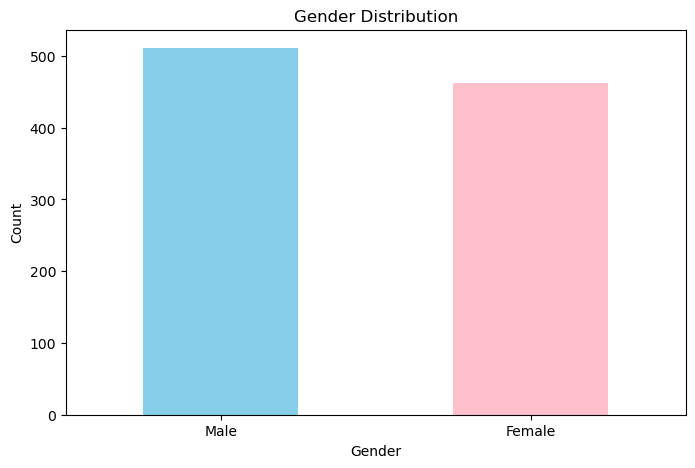

In [67]:
# Count the frequencies of each gender
gender_counts = df['Gender'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Age distribution')

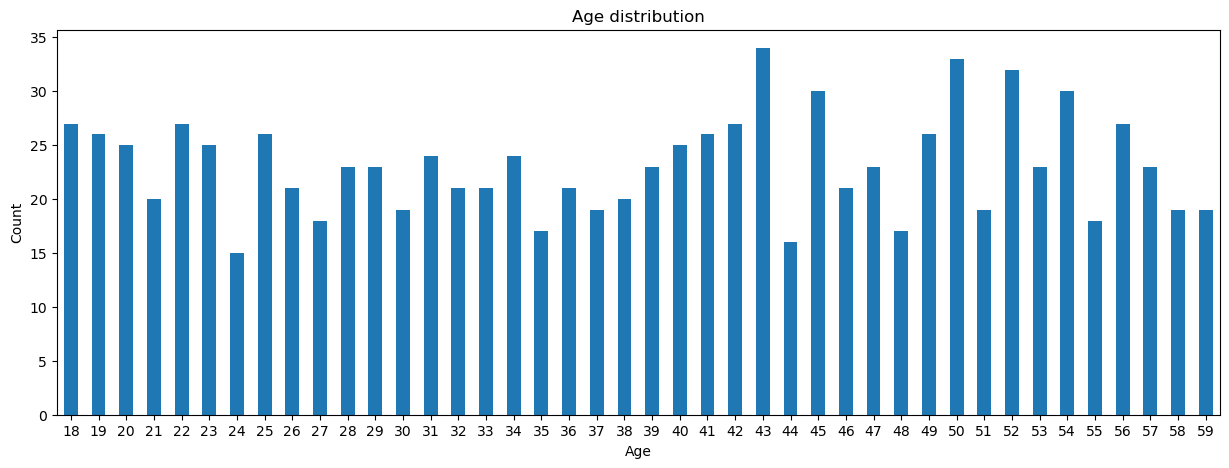

In [68]:
age_counts = df["Age"].value_counts().sort_index()
age_counts.plot(kind="bar", figsize=(15, 5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title("Age distribution")

In [69]:
print(f"{df.loc[df['Age'] <= 24]['Age'].count()} are below 25 yers old.")


165 are below 25 yers old.


In [70]:
age_group_1 = df.loc[df.Age <= 24]
age_group_2 = df.loc[(df.Age > 24) & (df.Age <= 34)]
age_group_3 = df.loc[(df.Age > 34) & (df.Age <= 44)]
age_group_4 = df.loc[(df.Age > 44) & (df.Age <= 54)]
age_group_5 = df.loc[(df.Age > 54) & (df.Age <= 64)]
age_group_1.tail()

,Age,Gender,weight,height,Max_BPM,Avg_BPM,Resting_BPM,session_duration,Calories_Burned,Workout_Type,Fat_Percentage,water_intake,workout_frequency,Experience_Level,BMI
960,19,Female,69.2,1.60,186,155,74,1.17,907.0,Cardio,32.4,1.6,3,1,27.03
965,23,Female,44.1,1.62,196,122,58,0.58,354.0,Yoga,25.7,2.7,2,1,16.80
966,23,Male,87.3,1.91,164,129,58,1.87,1327.0,HIIT,11.8,3.5,5,3,23.93
967,20,Male,55.0,1.60,172,168,67,1.12,1035.0,Yoga,24.0,3.2,4,2,21.48
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77


In [71]:
weight_by_gender = df.groupby("Gender")["weight"].agg(["min", "max", "mean"])
weight_by_gender

,min,max,mean
Gender,,,
Female,40.0,79.9,60.939827
Male,45.0,129.9,85.531115


In [72]:
heaviest_male = df.loc[df['weight'] == 129.9]
heaviest_male

,Age,Gender,weight,height,Max_BPM,Avg_BPM,Resting_BPM,session_duration,Calories_Burned,Workout_Type,Fat_Percentage,water_intake,workout_frequency,Experience_Level,BMI
593,55,Male,129.9,1.73,187,155,60,0.69,529.0,Yoga,21.7,3.1,3,1,43.4


In [73]:
df_females = df.loc[df.Gender == "Female"]
heaviest_female = df_females.loc[df['weight'] == df_females['weight'].max()]
heaviest_female


,Age,Gender,weight,height,Max_BPM,Avg_BPM,Resting_BPM,session_duration,Calories_Burned,Workout_Type,Fat_Percentage,water_intake,workout_frequency,Experience_Level,BMI
643,52,Female,79.9,1.51,190,142,54,0.75,479.0,Strength,31.5,2.6,3,1,35.04


## Workout types

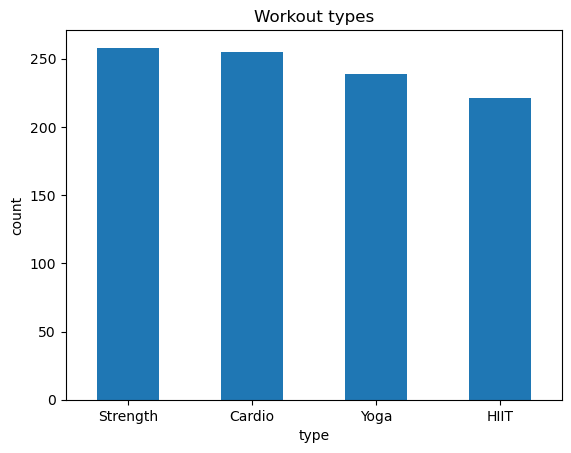

In [75]:
df["Workout_Type"].value_counts().plot(kind="bar")
plt.title('Workout types')
plt.xlabel('type')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [76]:
workout_type_by_gender = df.groupby("Gender")["Workout_Type"].value_counts()
workout_type_by_gender

Gender  Workout_Type
Female  Cardio          126
        Strength        123
        HIIT            107
        Yoga            106
Male    Strength        135
        Yoga            133
        Cardio          129
        HIIT            114
Name: count, dtype: int64

## Misc

Text(0, 0.5, 'Calories burned')

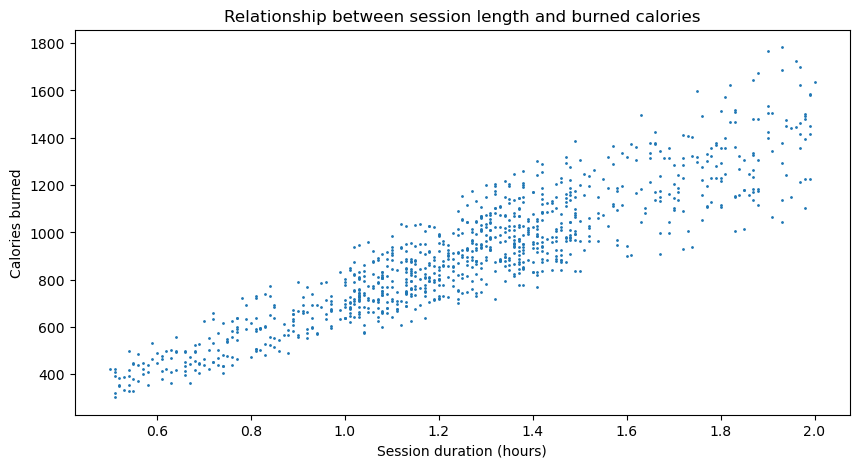

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Relationship between session length and burned calories")
ax.scatter(df["session_duration"], df["Calories_Burned"], s=1)
ax.set_xlabel("Session duration (hours)")
ax.set_ylabel("Calories burned")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Relationship between height and weight")
ax.scatter(df["height"], df["weight"], s=1)
ax.set_xlabel("Session duration (hours)")
ax.set_ylabel("Calories burned")

In [78]:
print("Calories burned by workout type:")
df.groupby("Workout_Type").Calories_Burned.agg(["min", "max", "mean"])

Calories burned by workout type:


,min,max,mean
Workout_Type,,,
Cardio,303.0,1625.0,884.513725
HIIT,333.0,1766.0,925.805430
Strength,350.0,1783.0,910.697674
Yoga,330.0,1582.0,903.188285


In [99]:
df_grouped_by_age = df.groupby("Age")['Max_BPM'].agg(['mean'])
df_grouped_by_age.head()

,mean
Age,
18,180.777778
19,183.884615
20,178.640000
21,177.400000
22,177.962963


In [101]:
df_grouped_by_age.index

Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59],
      dtype='int64', name='Age')

Text(0, 0.5, 'Max_BPM')

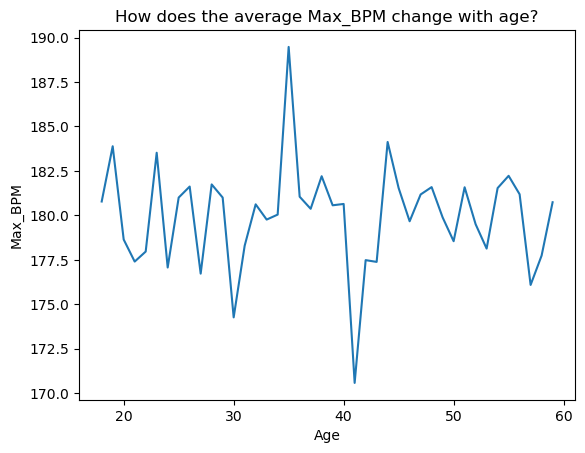

In [102]:
fig, ax = plt.subplots()
ax.set_title("How does the average Max_BPM change with age?")
ax.plot(df_grouped_by_age.index, df_grouped_by_age['mean'])
ax.set_xlabel("Age")
ax.set_ylabel("Max_BPM")